In [1177]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as scisig
import scipy.optimize as opt
import analysis_utils as au
import importlib

In [1338]:
filename = 'D:/Lab Data/diamond/240521/Mass/Particle 3/'
data = sio.loadmat(filename + 'NoChargeNoDrive.mat')
tt_ncnd = np.transpose(data['D'])[0]
fs_ncnd = int(1/data['Tinterval'][0][0])

In [1339]:
nps_frac = 1
PSD_ncnd = scisig.welch(tt_ncnd, fs = fs_ncnd, nperseg = int(nps_frac*fs_ncnd))

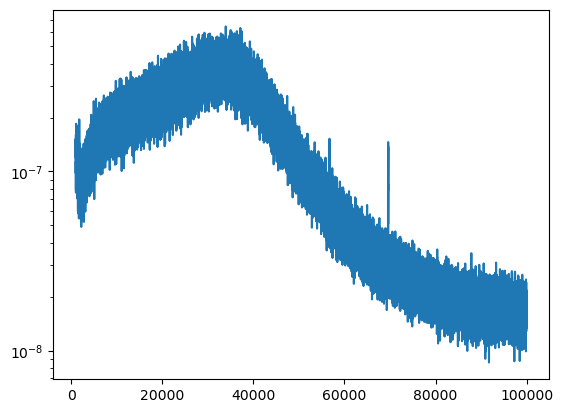

In [1340]:
lb = int(nps_frac*1000)
ub = int(nps_frac*100000)
plt.figure()
plt.plot(PSD_ncnd[0][lb:ub], PSD_ncnd[1][lb:ub])
plt.yscale('log')

In [1341]:
lb = int(nps_frac*20000)
ub = int(nps_frac*120000)
fit_ncnd, cov_ncnd = opt.curve_fit(au.Linewidth2, PSD_ncnd[0][lb:ub], PSD_ncnd[1][lb:ub], p0 = [10**12, 30000, 10000, 2*10**(-8)])
print(fit_ncnd)
fitted_ncnd = au.Linewidth2(PSD_ncnd[0], *fit_ncnd)

[3.10975946e+11 3.73223555e+04 2.57690228e+04 1.15786166e-08]


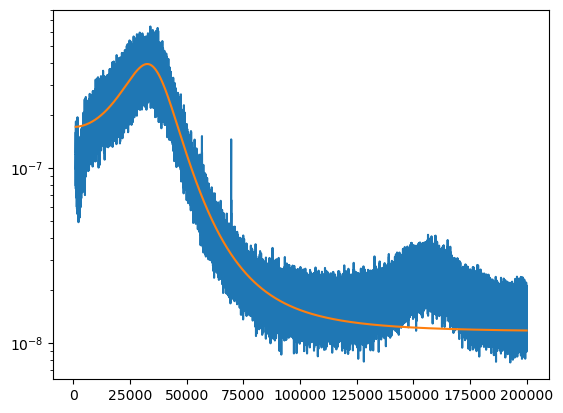

In [1342]:
lb = int(nps_frac*1000)
ub = int(nps_frac*250000)
plt.figure()
plt.plot(PSD_ncnd[0][lb:ub], PSD_ncnd[1][lb:ub])
plt.plot(PSD_ncnd[0][lb:ub], fitted_ncnd[lb:ub])
plt.yscale('log')

In [1343]:
lb = int(nps_frac*15000)
ub = int(nps_frac*100000)
area_1 = np.trapz(PSD_ncnd[1][lb:ub], PSD_ncnd[0][lb:ub]) - (lb-ub)/nps_frac*fit_ncnd[3]
lb = int(nps_frac*0)
ub = int(nps_frac*200000)
area_2 = np.trapz(fitted_ncnd[lb:ub], PSD_ncnd[0][lb:ub]) - (lb-ub)/nps_frac*fit_ncnd[3]
print(area_1)
print(area_2)
# Use area_2 for uncalibrated variance of oscillator

0.012844812969913088
0.018226567942166053


In [1344]:
# Let's make a graph of charge changes to put in presentation

In [1345]:
filename = 'D:/Lab Data/diamond/240521/Charging/Particle 3/Before/Before_'
files = [1, 2]
end = '.mat'

In [1346]:
X = np.zeros(0)
theta = np.zeros(0)
HV = np.zeros(0)
for file in files:
    data = sio.loadmat(filename+str(file)+end)
    X = np.concatenate((X, np.transpose(data['E'])[0]))
    theta = np.concatenate((theta, np.transpose(data['F'])[0]))
    HV = np.concatenate((HV, np.transpose(data['G'])[0]))
time = np.linspace(0, len(X)*0.001, len(X))

Text(0, 0.5, 'Charge (e)')

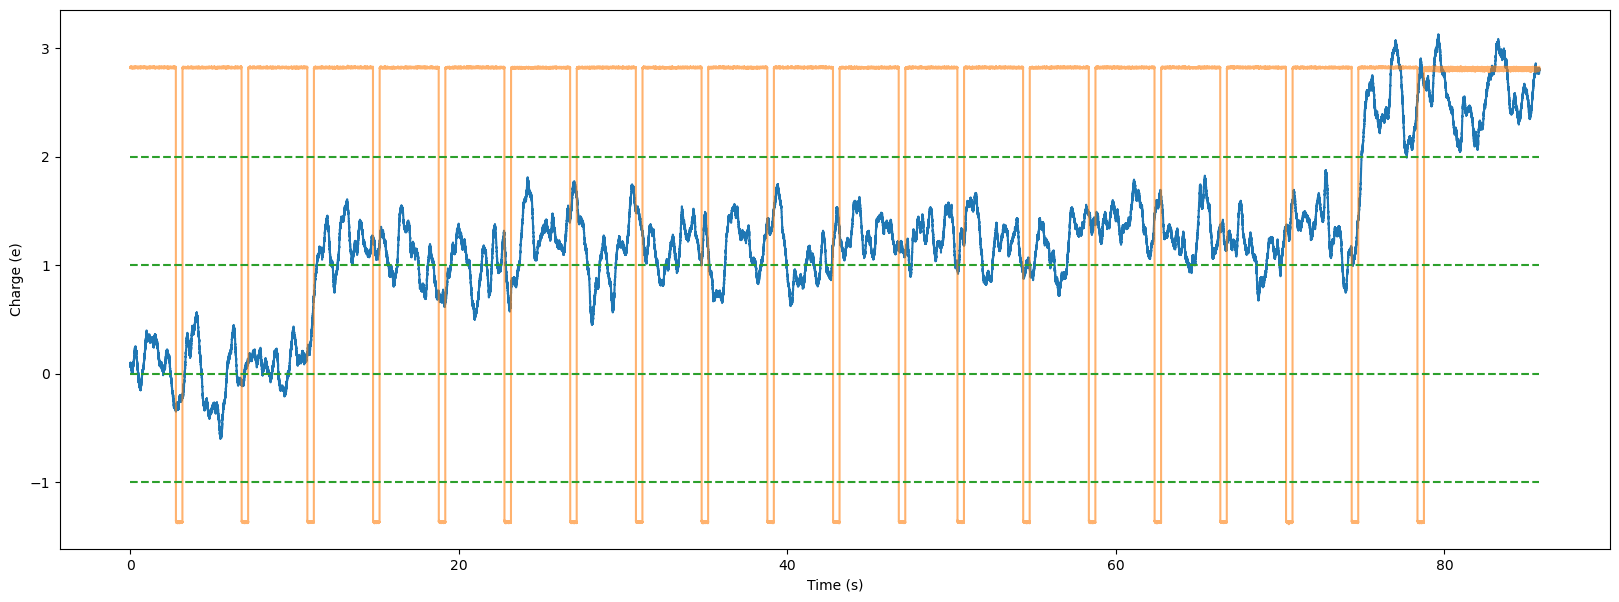

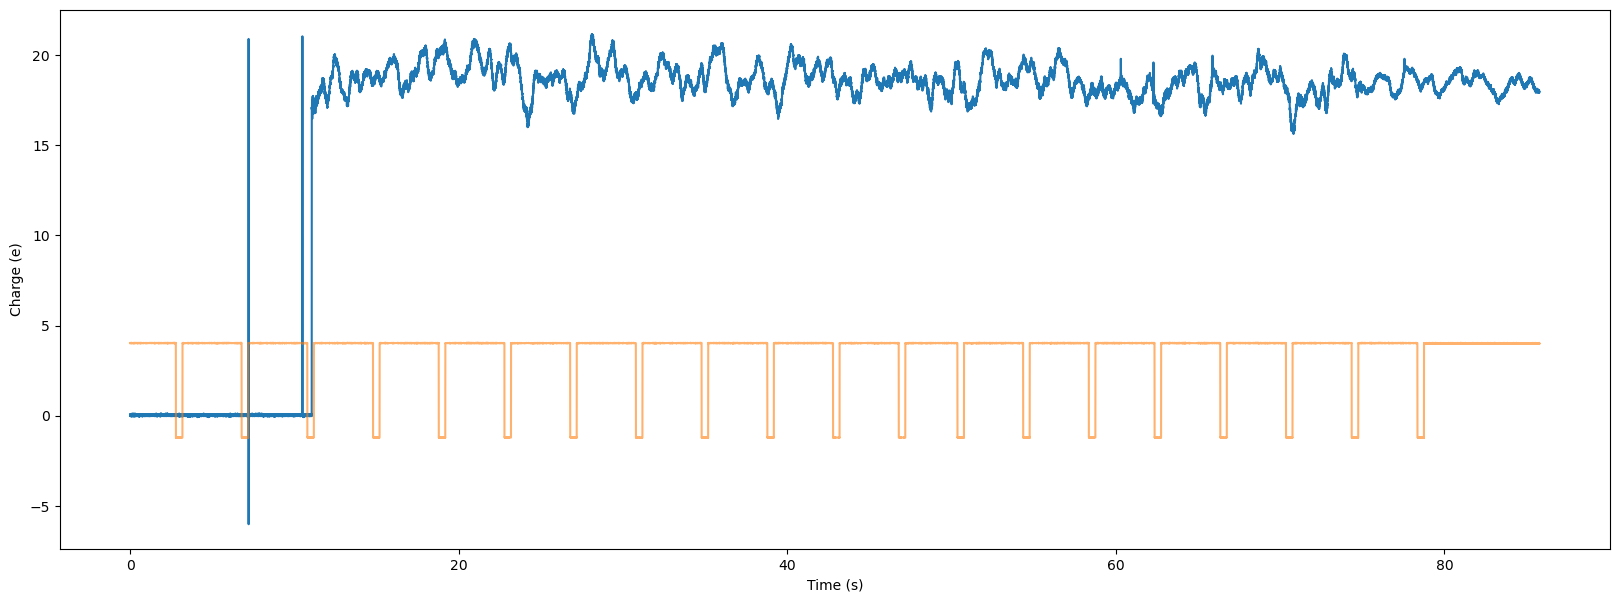

In [1347]:
plt.figure(figsize = (20, 7))
plt.plot(time, X/0.04)
plt.plot(time, (HV/1+0.7)/0.25, alpha = 0.6)
plt.plot([time[0], time[-1]], [-1, -1], 'tab:green', linestyle = '--')
plt.plot([time[0], time[-1]], [0.0, 0.0], 'tab:green', linestyle = '--')
plt.plot([time[0], time[-1]], [1, 1], 'tab:green', linestyle = '--')
plt.plot([time[0], time[-1]], [2, 2], 'tab:green', linestyle = '--')
plt.xlabel('Time (s)')
plt.ylabel('Charge (e)')
plt.figure(figsize = (20, 7))
plt.plot(time, theta/0.2)
plt.plot(time, (HV/1+0.8)/0.2, alpha = 0.6)
plt.xlabel('Time (s)')
plt.ylabel('Charge (e)')

In [1319]:
# So two charges on particle before frequency comb

In [1348]:
filename = 'D:/Lab Data/diamond/240521/Mass/Particle 3/'
data = sio.loadmat(filename + 'FreqComb.mat')
tt_fc = np.transpose(data['D'])[0]
drive_fc = np.transpose(data['G'])[0]
fs_fc = int(1/data['Tinterval'][0][0])

In [1349]:
nps_frac = 1
PSD_fc= scisig.welch(tt_fc, fs = fs_fc, nperseg = int(nps_frac*fs_fc))
PSD_drive_fc= scisig.welch(drive_fc, fs = fs_fc, nperseg = int(nps_frac*fs_fc))

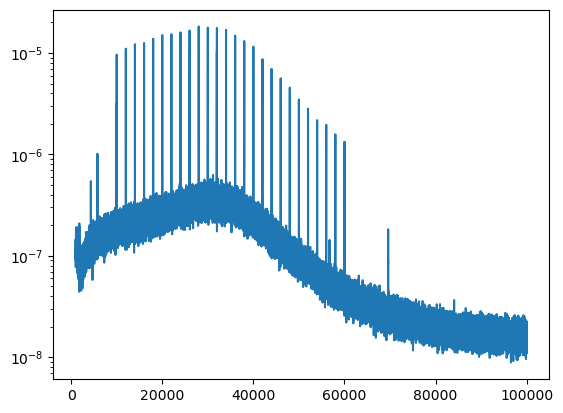

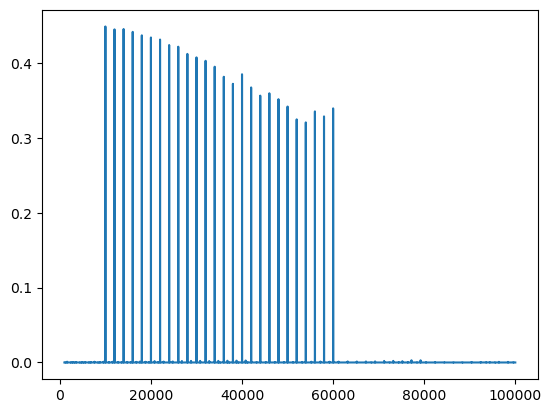

In [1350]:
lb = int(nps_frac*1000)
ub = int(nps_frac*100000)
plt.figure()
plt.plot(PSD_fc[0][lb:ub], PSD_fc[1][lb:ub])
plt.yscale('log')
lb = int(nps_frac*1000)
ub = int(nps_frac*100000)
plt.figure()
plt.plot(PSD_drive_fc[0][lb:ub], PSD_drive_fc[1][lb:ub])

In [1351]:
len(tt_fc)/fs_fc

22.59649

In [1352]:
PSD_sin = scisig.welch(np.sin(2*np.pi*60000*np.linspace(0, len(tt_fc)/fs_fc, len(tt_fc))), fs = fs_fc, nperseg = int(nps_frac*fs_fc))

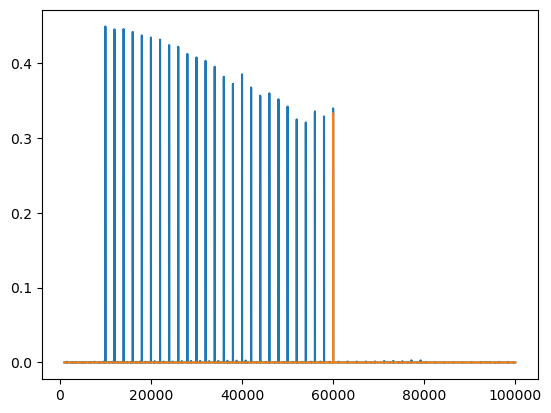

In [1353]:

lb = int(nps_frac*1000)
ub = int(nps_frac*100000)
plt.figure()
plt.plot(PSD_drive_fc[0][lb:ub], PSD_drive_fc[1][lb:ub])
plt.plot(PSD_sin[0][lb:ub], PSD_sin[1][lb:ub])

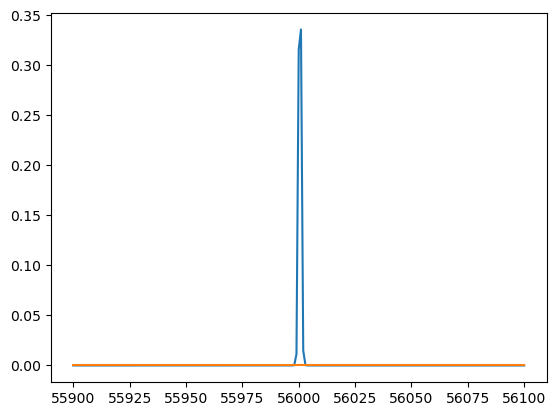

In [1356]:
lb = int(nps_frac*56000)-100
ub = int(nps_frac*56000)+101
plt.figure()
plt.plot(PSD_drive_fc[0][lb:ub], PSD_drive_fc[1][lb:ub])
plt.plot(PSD_sin[0][lb:ub], PSD_sin[1][lb:ub])

In [1357]:
def Line(x, a, b):
    return a*x + b

def sum_and_fit(amp, data, freqs):
    ran = 50
    areal2 = []
    fit1l = []
    fit2l = []
    line11l = []
    line12l = []
    for n, j in enumerate(freqs):
        ran = ran
        areal = []
        j = int(j)
        for i in range(j-100, j+100):
            area = np.trapz(amp[j-100:i], data[j-100:i])
            areal.append(area)
        areal2.append(areal)
        fit1lin, cov1lin = opt.curve_fit(Line, data[j-100:j-20], areal[:80])
        fit2lin, cov2lin = opt.curve_fit(Line, data[j+20:j+100], areal[-80:])
        fit1l.append(fit1lin)
        fit2l.append(fit2lin)

        line1 = Line(data[j-100:j+100], fit1lin[0], fit1lin[1])
        line2 = Line(data[j-100:j+100], fit2lin[0], fit2lin[1])
        line11l.append(line1)
        line12l.append(line2)
        
    return areal2, fit1l, fit2l, line11l, line12l

In [1358]:
freqs = np.linspace(10000*nps_frac, 60000*nps_frac, 26)
foo = sum_and_fit(PSD_fc[1], PSD_fc[0], freqs)
bar = sum_and_fit(PSD_drive_fc[1], PSD_drive_fc[0], freqs)

In [1359]:
# for i in range(26):
#     plt.figure()
#     plt.plot(bar[0][i], 'o')
#     plt.plot(bar[3][i])
#     plt.plot(bar[4][i])

diff_l = []
for i in range(26):
    diff = foo[4][i][100] - foo[3][i][100]
    diff_l.append(diff)
    
diff_l2 = []
for i in range(26):
    diff = bar[4][i][100] - bar[3][i][100]
    diff_l2.append(diff)

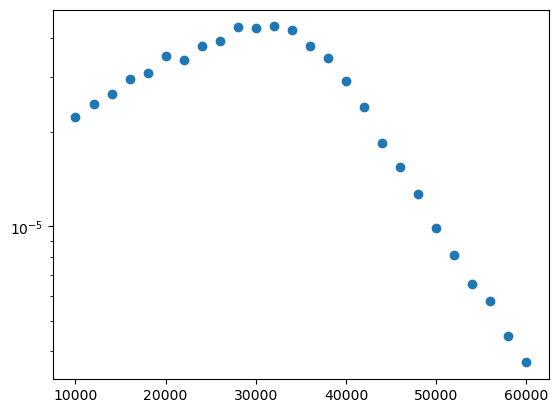

In [1360]:
plt.plot(freqs, np.array(diff_l)/np.array(diff_l2), 'o')
plt.yscale('log')

In [1361]:
importlib.reload(au)
fit_cp, cov_cp = opt.curve_fit(au.Linewidth, freqs/nps_frac, np.array(diff_l)/np.array(diff_l2)*0.5, p0 = [10**10, 30000, 10000]) # doing /areas_fc*0.5 normalizes everything to as if it was dirven by a 1V wave at each frequency so can assume 1V in the last step
fitted_cp = au.Linewidth(PSD_fc[0], *fit_cp)

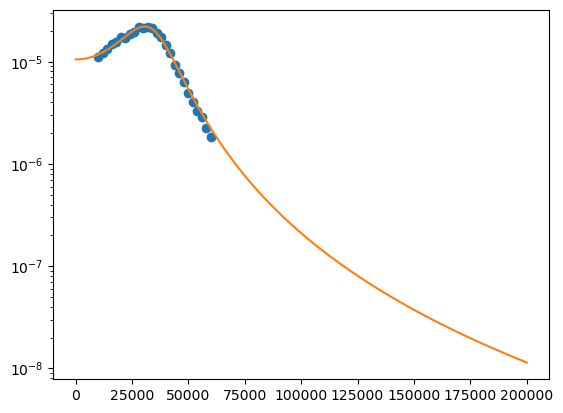

In [1362]:
plt.plot(freqs/nps_frac, np.array(diff_l)/np.array(diff_l2)*0.5, 'o')
plt.plot(PSD_fc[0], fitted_cp)
plt.yscale('log')

In [1363]:
print(fit_ncnd)
print(fit_cp)

[3.10975946e+11 3.73223555e+04 2.57690228e+04 1.15786166e-08]
[1.74314733e+13 3.58980822e+04 2.66791389e+04]


In [1364]:
F0 = 122*2*1.6*10**(-19)*20 # 20 for amplifier
w0 = fit_ncnd[1]*2*np.pi
T = 293
kb = 1.38*10**(-23)

In [1380]:
mass = F0**2*w0**2*area_2/(2*np.pi)**4/2/fit_cp[0]/T/kb
mass1 = 4/3*np.pi*1000*(113*10**(-9))**3
mass/mass1

0.9993449283458455

In [1368]:
print(mass)

2.781327085591267e-18


In [1228]:
mass1 = 4/3*np.pi*2200*(83*10**(-9))**3
print(mass1*w0**2*area_1/kb/T)
print(2*mass1**2*fit_cp[0]*(2*np.pi)**4/F0**2)

21882123542528.973
20471145635854.02


In [1229]:
mass1 = 4/3*np.pi*2200*(83*10**(-9))**3

In [1230]:
mass/mass1

1.163305582479387

In [1070]:
np.sqrt(4/3*np.pi*2200*(83*10**(-9))**3*w0**2*area_1/kb/T)/10**6

2.825961093407782

In [802]:
freqs[10]*100

60000.0

In [703]:
fit_ncnd

array([1.32671178e+11, 3.03827369e+04, 2.08162777e+04, 1.03030906e-08])

In [705]:
k = 10
actual = (areas_resp[k]-areas_tf[k])*0.5/areas_fc[k]
w0**2*area_2*(F0)**2/(2*np.pi)**1/actual/2/kb/T/((fit_ncnd[1]**2-(freqs[k]*10)**2)**2 + (freqs[k]*10)**2*fit_ncnd[2]**2)

6.09412098150871e-21

In [459]:
mass1

5.269210726613231e-18

In [419]:
fit_ncnd[2]

18051.1697853283

In [1391]:
w0 = 55000*2*np.pi # Natural frequency of oscillator
P = 10 # Pressure in mbar
T = 293 # Environmental temperature
R = (0.113)*10**(-6) # Particle Radius
p = 1000 # Particle Denisty
dtn = 1*10**(-8) # Timestep
M = 4/3*np.pi*R**3*p # Particle mass
kb = 1.38*10**(-23) # Boltzmann constant
m = 29*1.67*10**(-27) # average mass of air particles
v = np.sqrt(8*1.38*10**(-23)*T/(np.pi*m)) # velocity of air particles
N0 = 2.43*10**(25) # Number density of air and ambient pressure
P0 = 1000 # Ambient pressure
N=N0*P/P0 # Number density of air at pressure P

y = (4/3*np.pi)*(m*v*N*R**2)/(M) # Damping from air

In [1392]:
y

48020.698746837625